# ICA e PCA - Esempi


## FastICA on 2D point clouds

Esempio disponibile sul sito di [scikit-learn](https://scikit-learn.org/dev/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py).

### Generazione campione

In [5]:
import numpy as np

from sklearn.decomposition import PCA, FastICA

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.0

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations


### ICA e PCA

In [7]:

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng, whiten="arbitrary-variance")
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

### Risultati

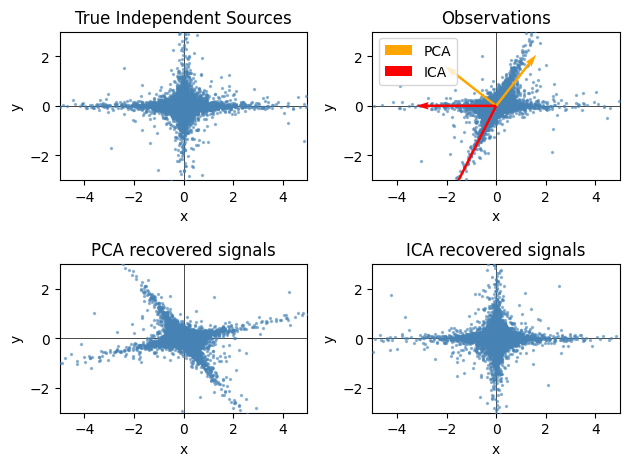

In [8]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title("True Independent Sources")

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_))
plt.title("PCA recovered signals")

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title("ICA recovered signals")

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.tight_layout()
plt.show()